## Demo of DBScan outlier detection

In [2]:
import pandas as pd 

data = pd.read_csv('../data/outlier.csv')
data.head()

,x_coord,y_coord
0,-5.577854,5.872988
1,1.627832,4.178069
2,-6.371844,4.419223
3,1.750055,5.445829
4,6.550104,-7.912339


DBScan algoritm takes 3 parameters:
1. minPts - number of neighbours for being a core point
2. epsilon - radius of circle that defines neighbourhood
3. distance metric - to measure distance between points





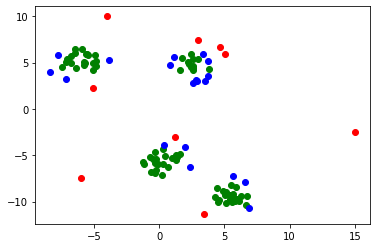

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

def dbscan(data, minPts, eps, distance='euclid'):
    
    N = data.shape[0]
    # label 0->outlier 1->core 2->core-connected
    labels = np.zeros(N)
    dist = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            point1 = data.iloc[i]
            point2 = data.iloc[j] 
            
            if distance == 'euclid':
                if i == j:
                    dist[i,j] = 0
                else:
                    dist[i,j] = np.sum((point1 - point2)**2)
            else:
                raise ValueError(f'Distance metric {distance} is not defined!')

    # first label core points first
    for i in range(N):
        idist = dist[i,:]
        nneigh = np.sum(idist<=eps) 
        if nneigh>=minPts:
            labels[i] = 1
        
    
    # then find core-connected points
    for i in range(N):
        if labels[i] == 1:
            continue

        idist = dist[i,:]
        ind = idist<=eps 
        for j,isNeigh in enumerate(ind):
            if isNeigh and labels[j] == 1:
                labels[i] = 2
    
    return labels
    

labels = dbscan(data, 8, 2)
label_names = ['outlier','core','core-connected']
for i in range(data.shape[0]):
    print(f"({data['x_ccord'].iloc[i]},{{data['x_ccord'].iloc[i]}})")
    
# now visualize
plt.scatter(data['x_coord'][labels==0],data['y_coord'][labels==0], color='red')
plt.scatter(data['x_coord'][labels==1],data['y_coord'][labels==1], color='green')
plt.scatter(data['x_coord'][labels==2],data['y_coord'][labels==2], color='blue')

